# Vocabulary
 - Sampling bias - even very large samples can be nonrepresentative if the sampling method is flawed.
 - Stratified sampling - When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population. If the people running the survey used purely random sampling, there would be about a 12% chance of sampling a skewed test set that was either less than 49% female or more than 54% female. Either way, the survey results would be significantly biased.

In [7]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

In [9]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [10]:
housing = load_housing_data()

In [11]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [15]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

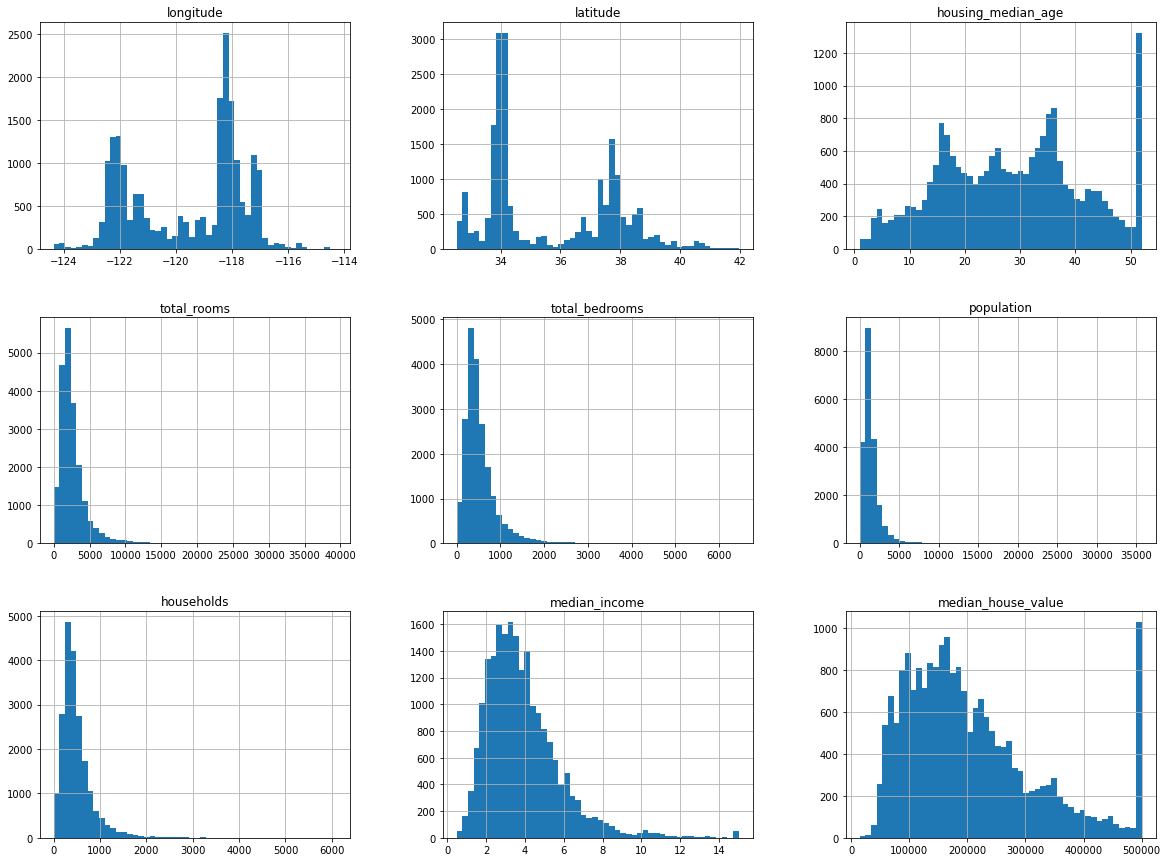

In [16]:
housing.hist(bins=50, figsize=(20,15))

#### Problems with this histogram:

 * Tail heavy (bell shaped better)
 * Clipping on house value (prediction accuracy over 500k)
 * Different Scales

## Splitting off test / train sets

We need consistent way to split data into test/train sets.  Using random number generator is not reproducable.
Seeding random number generator with or saving split indices does not scale for new data.

Suggested solution is to compute on the fly which set data row belongs to using hashing on some known immutable attribute. (investigate this approach further)

In [17]:
import numpy as np

In [18]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Add index column (based on the row number)

In [19]:
housing_with_id = housing.reset_index()

In [20]:
housing_with_id.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEAR BAY  
4        NEAR BAY

#### train_set_split() from Scikit-learn

Scikit-learn has a function to accomplish the above with some extra features added.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### Straified sampling to reduce sampling bias.

In [23]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0,1.5,3.0, 4.5, 6, np.inf],
                               labels=[1,2,3,4,5])


<AxesSubplot:>

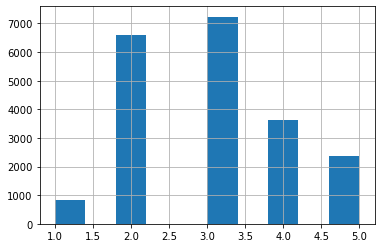

In [24]:
housing['income_cat'].hist()

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Drop the extra cats from the result sets

## Discover and Visualize the Data to Gain Insights

Copy the training set or make a subset of that (if the set is to large) for exploration.

In [27]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

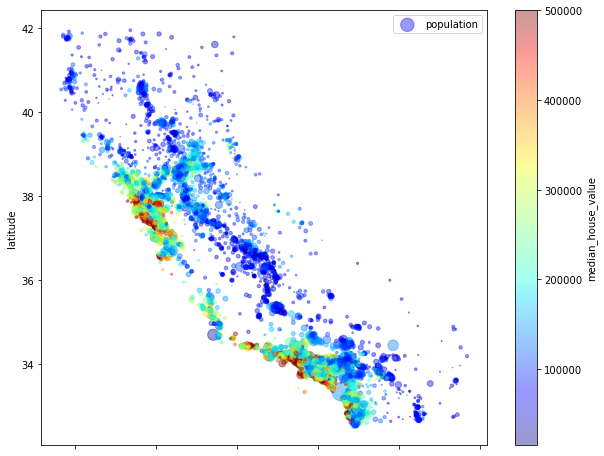

In [28]:
housing.plot(kind='scatter', 
             x='longitude', 
             y='latitude', 
             alpha=0.4, 
             s=housing['population']/100, 
             label='population', 
             c='median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True,
             figsize=(10, 8))

### Correlation cooficient

In [29]:
corr_matrix = housing.corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [31]:
from pandas.plotting import scatter_matrix

In [32]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

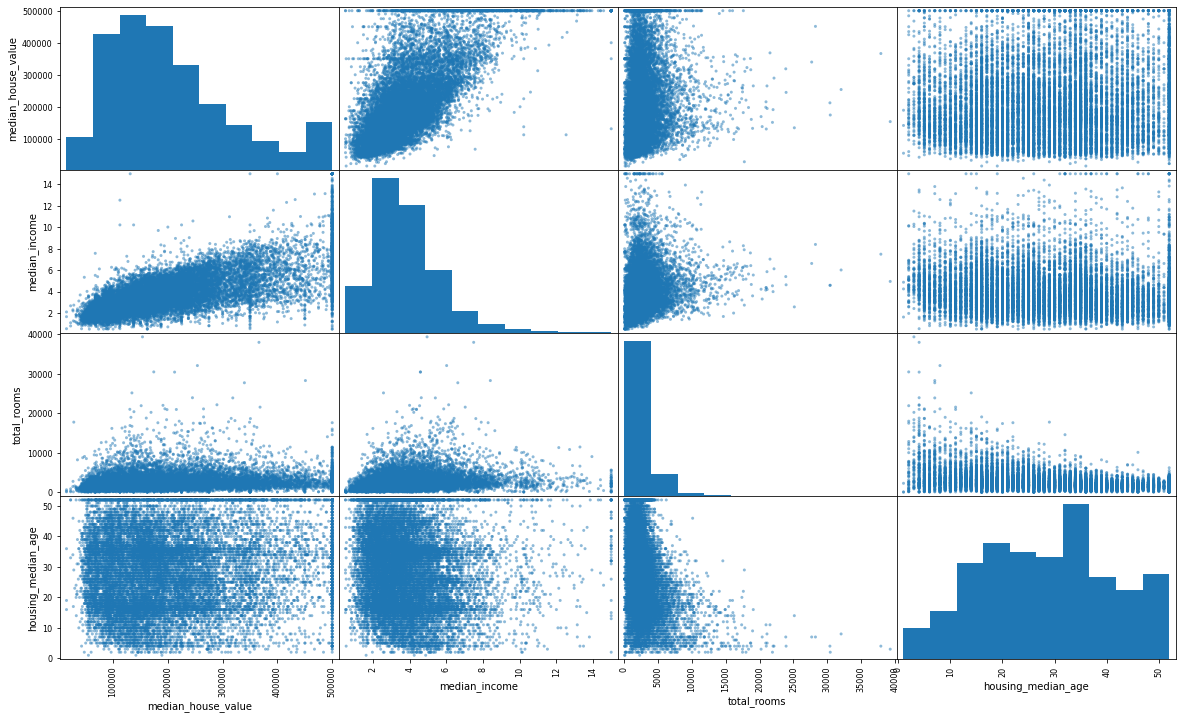

In [33]:
scatter_matrix(housing[attributes], figsize=(20,12))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

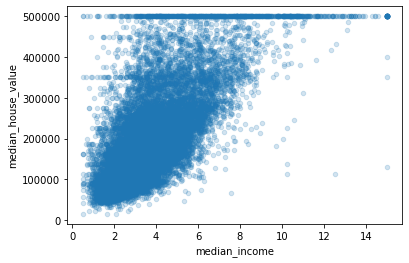

In [34]:
housing.plot(kind='scatter', y='median_house_value', x='median_income', alpha=0.2)

### Adding some useful metrics

In [35]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

In [36]:
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

In [37]:
housing['population_per_household'] = housing['population'] / housing['households']

In [38]:
new_matrix = housing.corr()
new_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Data Preparation

In [39]:
housing = strat_train_set.drop('median_house_value', axis=1)

In [40]:
housing_labels = strat_train_set['median_house_value'].copy()

### Clean up missing values

total_bedrooms has some missing values so we have 3 approaches to rectify this: 
 * get rid of corresponding districts
 * get rid of entire attribute
 * set the missing values to something (zero, mean, median etc)
 
 DataFrame approach:
 ```python
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

#### Scikit-learn SimpleImputter for missing values

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer(strategy='median')

Median can only be computed on numeric values, so we need to extract only numerics.

In [43]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [44]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [45]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [46]:
housing_num.median()

/tmp/ipykernel_406/2205485363.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median()


longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [47]:
X = imputer.transform(housing_num)

In [48]:
# Back to pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [49]:
housing_tr.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


### Handling text and Category attributes

In [50]:
housing_cat = housing[['ocean_proximity']]

In [51]:
housing_cat

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
...               ...
15174       <1H OCEAN
12661          INLAND
19263       <1H OCEAN
19140       <1H OCEAN
19773          INLAND

[16512 rows x 1 columns]

In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
ordinal_encoder = OrdinalEncoder()

In [54]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [55]:
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [56]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> ### NOTE
>
> The above is OK if categories are related ex. good > better > best.  
>
> Categories encoding that will better fit this scenario, will be creating a column
> for each category with binary (0,1) values.

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
cat_encoder = OneHotEncoder()

In [59]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
                                    

In [60]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Custom Transformers

Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies
on duck typing (not inheritance), all you need to do is create a class and
implement three methods: fit() (returning self), transform(), and
fit_transform().
You can get the last one for free by simply adding TransformerMixin as a
base class. If you add BaseEstimator as a base class (and avoid *args and
**kargs in your constructor), you will also get two extra methods
(get_params() and set_params()) that will be useful for automatic
hyperparameter tuning.

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [62]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [63]:
housing_extra_attrib = attr_adder.transform(housing.values)

## Feature Scaling
Generally ML algorithms don't perform well when feature values have noticably different scales.  We most likely want to rescale values to common range.  2 common ways 
of rescaling the values are MinMax scaling (normalization) and standardization.  Scikit make 2 classes available for this purpose:
 * MinMaxScaler
 * StandardScaler
   * Does not bound values to 0-1 range which can be problematic for some ML algorithms
   * Not affected by outliers

## Transformation Piepliens

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [67]:
from sklearn.compose import ColumnTransformer

In [68]:
num_attribs = list(housing_num)

In [69]:
cat_attribs = ['ocean_proximity']

In [70]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [71]:
housing_prepared = full_pipeline.fit_transform(housing)

In [72]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])


___
## Select and train model

In [208]:
from sklearn.linear_model import LinearRegression

In [212]:
lin_reg = LinearRegression()

In [213]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [214]:
some_data = housing.iloc[:5]

In [215]:
some_labels = housing_labels.iloc[:5]

In [216]:
some_data_prepared = full_pipeline.transform(some_data)

Predictions: 

In [221]:
print(lin_reg.predict(some_data_prepared))

[ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


Actual Labels:

In [220]:
list(some_labels)

[72100.0, 279600.0, 82700.0, 112500.0, 238300.0]

#### Measuring prediction error

In [223]:
from sklearn.metrics import mean_squared_error

In [226]:
housing_predictions = lin_reg.predict(housing_prepared)

In [227]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [228]:
lin_rmse = np.sqrt(lin_mse)

In [229]:
lin_rmse

68627.87390018743

Error is pretty big.  68k on a house is a significant difference.  This is an example of underfitting.  To remedy this we can: 
 * select more powerful model
 * feed algorithm with better features
 * reduce constraints on the model (this model is not regularized so this option does not apply here)

### DecisionTreeRegressor (a more powerful model approach)

In [230]:
from sklearn.tree import DecisionTreeRegressor

In [231]:
tree_reg = DecisionTreeRegressor()

In [232]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [233]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [234]:
housing_predictions = tree_reg.predict(housing_prepared)

In [235]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [237]:
tree_rmse = np.sqrt(tree_mse)

In [238]:
tree_rmse

0.0

Badly overfit model? By principle we don't want to use the test set until we are sure about the model.  This is not the case here, so one solution would be to split the training set in 2 using 1 part for training and another part for validation.  One way would be to use `train_test_split()` function to split training set into training and validation sets. 

#### Better Evaluation Using Cross-Validation (K-fold cross-validation)
The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [239]:
from sklearn.model_selection import cross_val_score

In [240]:
scores = cross_val_score(tree_reg, 
                         housing_prepared, 
                         housing_labels, 
                         scoring='neg_mean_squared_error',
                         cv=10
                        )

In [241]:
tree_rmse_scores = np.sqrt(-scores)

In [245]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

In [246]:
display_scores(tree_rmse_scores)

Scores:  [73281.70772334 69689.00188736 67031.71410599 70720.11406448
 69635.55944504 76564.72401167 70323.13414982 72923.11627917
 68300.97270612 71320.43455685]
Mean:  70979.04789298314
Standard deviation:  2590.7131633291324


In [247]:
lin_scores = cross_val_score(lin_reg,
                             housing_prepared,
                             housing_labels,
                             scoring='neg_mean_squared_error',
                             cv=10)

In [248]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [249]:
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard deviation:  2880.3282098180634


> ---
> #### Conclusion:
>
> DecisionTreeRegressor overfits so badly, it performs worse than LinearRegressor
>
> ---


### RandomForestRegressor 

In [257]:
from sklearn.ensemble import RandomForestRegressor

In [258]:
forest_reg = RandomForestRegressor()

In [271]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [266]:
forest_scores = cross_val_score(forest_reg,
                                housing_prepared,
                                housing_labels,
                                scoring='neg_mean_squared_error',
                                cv=10
                               )

In [267]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [268]:
display_scores(forest_rmse_scores)

Scores:  [51633.44320384 48923.38305423 46639.29815187 52059.70630197
 47064.99519532 52105.40807499 52288.72840677 50056.25790077
 48395.79610437 54010.73072346]
Mean:  50317.77471175908
Standard deviation:  2351.637942968761


In [272]:
housing_predictions = forest_reg.predict(housing_prepared) 

In [273]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)

In [274]:
np.sqrt(forest_mse)

18623.141199373662

> ---
> #### TODO:
> Experiment with additional models and try saving models. (Need some serialization library)
>
> You should save every model you experiment with so that you can come back easily to any model you want. Make sure you save both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as well. This will allow you to easily compare scores across model types, and compare the types of errors they make. You can easily save Scikit-Learn models by using Python’s
module or by using the library, which is more efficient at serializing large NumPy arrays (you can install this library using pip)
> ---

---
## Fine Tuning the Model
One option would be to fiddle with the hyperparameters manually, until a good combination of hyperparameter values is found. This would be very tedious work.

### GridSearchCV

In [276]:
from sklearn.model_selection import GridSearchCV

In [296]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

In [278]:
forest_reg = RandomForestRegressor()

In [297]:
grid_search = GridSearchCV(forest_reg,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [298]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [299]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [300]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [301]:
cvres = grid_search.cv_results_

In [302]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63956.35844698981 {'max_features': 2, 'n_estimators': 3}
55025.27197575802 {'max_features': 2, 'n_estimators': 10}
52720.82745067484 {'max_features': 2, 'n_estimators': 30}
60179.50493264938 {'max_features': 4, 'n_estimators': 3}
52667.91095179164 {'max_features': 4, 'n_estimators': 10}
50758.073573987975 {'max_features': 4, 'n_estimators': 30}
60044.58284149069 {'max_features': 6, 'n_estimators': 3}
52263.48649032275 {'max_features': 6, 'n_estimators': 10}
50000.28178138656 {'max_features': 6, 'n_estimators': 30}
59314.873218509485 {'max_features': 8, 'n_estimators': 3}
51909.30290735187 {'max_features': 8, 'n_estimators': 10}
50160.72530351152 {'max_features': 8, 'n_estimators': 30}
62083.87893970856 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54532.429887359176 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60041.80127206607 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52746.207019770816 {'bootstrap': False, 'max_features': 3, 'n_estimators'

> ---
> #### TODO: 
> Check how Custom Transformer hyperparameter can be added to the list `add_bedrooms_per_room`
>
> ---

> ---
> #### Note 
> Check out RandomizedSearchCV.  Should behave as above but finding best hyperparameter combination in predefined number of iterations.
>
> ---

In [303]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [304]:
feature_importances

array([8.19921445e-02, 8.29040615e-02, 4.25707458e-02, 1.81535405e-02,
       1.69870337e-02, 1.68120965e-02, 1.57460262e-02, 3.09004554e-01,
       6.78902048e-02, 1.06769869e-01, 8.34937073e-02, 1.13676797e-02,
       1.39162829e-01, 7.78554142e-05, 2.69121372e-03, 4.37643806e-03])

In [305]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room'] 

In [306]:
cat_encoder = full_pipeline.named_transformers_['cat']

In [315]:
cat_one_hot_attrt_attr = list(cat_encoder.categories_[0])

In [316]:
cat_one_hot_attr

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [317]:
res_attr = num_attribs + extra_attribs + cat_one_hot_attr

In [318]:
sorted(zip(feature_importances, res_attr), reverse=True)

[(0.3090045541469186, 'median_income'),
 (0.13916282919666775, 'INLAND'),
 (0.10676986871209865, 'pop_per_hhold'),
 (0.08349370733445147, 'bedrooms_per_room'),
 (0.0829040615322174, 'latitude'),
 (0.08199214451493006, 'longitude'),
 (0.06789020484485195, 'rooms_per_hhold'),
 (0.04257074584221088, 'housing_median_age'),
 (0.0181535405217247, 'total_rooms'),
 (0.016987033713214698, 'total_bedrooms'),
 (0.016812096484276774, 'population'),
 (0.015746026212680685, 'households'),
 (0.011367679747155744, '<1H OCEAN'),
 (0.004376438058820636, 'NEAR OCEAN'),
 (0.002691213723627478, 'NEAR BAY'),
 (7.785541415261393e-05, 'ISLAND')]

---
## Evaluate Model on the test Set

In [334]:
def evaluate_model(model, test_set, pipeline):
    x_test = test_set.drop('median_house_value', axis=1)
    y_test = test_set['median_house_value'].copy()
    x_test_prepared = pipeline.transform(x_test)
    final_predictions = model.predict(x_test_prepared)
    mse = mean_squared_error(y_test, final_predictions)
    rmse = np.sqrt(mse)
    return rmse

In [335]:
final_model = grid_search.best_estimator_

In [336]:
evaluate_model(final_model, strat_test_set, full_pipeline)

47587.512201580736

#### 95 % Confidence interval

In [328]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45599.82460014, 49495.44051231])

# Excercises

> ---
> 1. Try a Support Vector Machine regressor (sklearn.svm.SVR) with
various hyperparameters, such as kernel="linear" (with various
values for the C hyperparameter) or kernel="rbf" (with various
values for the C and gamma hyperparameters). Don’t worry about what
these hyperparameters mean for now. How does the best SVR
predictor perform?
> ---

In [2]:
from sklearn.svm import SVR

In [350]:
def svr_stuff(param_grid):
    svr = SVR()
    grid_search = GridSearchCV(svr,
                               param_grid,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
    return grid_search.fit(housing_prepared, housing_labels)
    

In [341]:
res = svr_stuff(
    [
        {'kernel': ['linear'], 'C': [3, 30, 300]},
        {'kernel': ['rbf'], 'C': [3,30, 300], 'gamma': [4,40,400]}
    ]
)

In [342]:
res.best_params_

{'C': 300, 'kernel': 'linear'}

In [343]:
res.best_estimator_

SVR(C=300, kernel='linear')

In [347]:
svr_res = res.cv_results_

In [349]:
for mean_score, params in zip(svr_res["mean_test_score"], svr_res["params"]):
    print(np.sqrt(-mean_score), params) 

102376.3300964536 {'C': 3, 'kernel': 'linear'}
75457.08963038966 {'C': 30, 'kernel': 'linear'}
70677.86808389986 {'C': 300, 'kernel': 'linear'}
118927.89032788499 {'C': 3, 'gamma': 4, 'kernel': 'rbf'}
118939.517822471 {'C': 3, 'gamma': 40, 'kernel': 'rbf'}
118939.59495449072 {'C': 3, 'gamma': 400, 'kernel': 'rbf'}
118844.65152387352 {'C': 30, 'gamma': 4, 'kernel': 'rbf'}
118936.24195993211 {'C': 30, 'gamma': 40, 'kernel': 'rbf'}
118937.02148986667 {'C': 30, 'gamma': 400, 'kernel': 'rbf'}
118029.46761517943 {'C': 300, 'gamma': 4, 'kernel': 'rbf'}
118932.34729415206 {'C': 300, 'gamma': 40, 'kernel': 'rbf'}
118932.6284612821 {'C': 300, 'gamma': 400, 'kernel': 'rbf'}


In [351]:
res = svr_stuff(
    [
        {'kernel': ['linear'], 'C': [300, 900, 1500]},
    ]
)

In [75]:
def grid_results(res):
    for mean_score, params in zip(res["mean_test_score"], res["params"]):
        print(np.sqrt(-mean_score), params) 

In [353]:
grid_results(res.cv_results_)

70677.86808389986 {'C': 300, 'kernel': 'linear'}
70399.70125557257 {'C': 900, 'kernel': 'linear'}
70353.42651074442 {'C': 1500, 'kernel': 'linear'}


> ---
> 2. Try replacing GridSearchCV with RandomizedSearchCV.
> ---

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=4, random_state=42, n_jobs=3)
rnd_search.fit(housing_prepared, housing_labels)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 3/5] END C=629.782329591372, gamma=3.010121430917521, kernel=linear;, score=-4989838309.053 total time=   7.5s
[CV 1/5] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf;, score=-4335636039.842 total time=  14.3s
[CV 4/5] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf;, score=-4536854683.142 total time=  13.1s
[CV 2/5] END C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf;, score=-9078754528.574 total time=  12.0s
[CV 5/5] END C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf;, score=-9560445961.856 total time=  12.2s
[CV 3/5] END C=432.37884813148855, gamma=0.15416196746656105, kernel=linear;, score=-4994456251.222 total time=   7.3s
[CV 1/5] END C=24.17508294611391, gamma=3.503557475158312, kernel=rbf;, score=-14112376480.223 total time=  13.4s
[CV 4/5] END C=24.17508294611391, gamma=3.503557475158312, kernel=rbf;, score=-14243790750.818 total time=  12.2s
[CV 2/5] END C

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50, n_jobs=3,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcf6f5b3cd0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcf6e53e0a0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=4)

[CV 4/5] END C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf;, score=-8085114927.076 total time=  12.8s
[CV 2/5] END C=6287.039489427172, gamma=0.3504567255332862, kernel=linear;, score=-4707177551.605 total time=   9.4s
[CV 5/5] END C=6287.039489427172, gamma=0.3504567255332862, kernel=linear;, score=-4786860896.657 total time=   9.5s
[CV 3/5] END C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf;, score=-4823642848.400 total time=  44.8s
[CV 5/5] END C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf;, score=-5316971211.427 total time=  47.8s
[CV 1/5] END C=33946.157064934, gamma=2.2642426492862313, kernel=linear;, score=-4818191130.756 total time=  15.0s
[CV 4/5] END C=33946.157064934, gamma=2.2642426492862313, kernel=linear;, score=-5400588332.874 total time=  14.8s
[CV 2/5] END C=84789.82947739525, gamma=0.3176359085304841, kernel=linear;, score=-4706550899.174 total time=  26.5s
[CV 3/5] END C=3582.0552780489566, gamma=1.1891370222133257, kernel=linear;,

In [76]:
grid_results(rnd_search.cv_results_)

70300.98256933097 {'C': 629.782329591372, 'gamma': 3.010121430917521, 'kernel': 'linear'}
67044.35376006806 {'C': 26290.206464300216, 'gamma': 0.9084469696321253, 'kernel': 'rbf'}
96909.67164587777 {'C': 84.14107900575871, 'gamma': 0.059838768608680676, 'kernel': 'rbf'}
70367.72058136907 {'C': 432.37884813148855, 'gamma': 0.15416196746656105, 'kernel': 'linear'}
118863.67394520435 {'C': 24.17508294611391, 'gamma': 3.503557475158312, 'kernel': 'rbf'}
69667.46259377453 {'C': 113564.03940586245, 'gamma': 0.0007790692366582295, 'kernel': 'rbf'}
108097.17539031297 {'C': 108.30488238805073, 'gamma': 0.3627537294604771, 'kernel': 'rbf'}
75845.61956823347 {'C': 21.344953672647435, 'gamma': 0.023332523598323388, 'kernel': 'linear'}
62826.40870732909 {'C': 5603.270317432516, 'gamma': 0.15023452872733867, 'kernel': 'rbf'}
55218.27408167732 {'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}
70295.64151982956 {'C': 27652.464358739708, 'gamma': 0.2227358621286903, 'kernel': 'li

> ---
> 3.
> ---

In [78]:
arr

NameError: name 'arr' is not defined